In [1]:
# p.106 Chapter4 データ前処理
import pandas as pd
from io import StringIO

# サンプルデータを作成
csv_data = '''A,B,C,D
              1.0,2.0,3.0,4.0
              5.0,6.0,,8.0
              10.0,11.0,12.0,'''

# サンプルデータを読み込む
df = pd.read_csv(StringIO(csv_data))
print(df)

      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN


In [2]:
# 各特徴量の欠損値をカウント
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [3]:
print(df.values)

[[ 1.  2.  3.  4.]
 [ 5.  6. nan  8.]
 [10. 11. 12. nan]]


In [4]:
# 欠損値を含む行を削除
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [5]:
# 欠損値を含む列を削除
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [6]:
# すべての列がNaNである行だけを削除
# (すべての値がNaNである行はないため、配列全体が返される)
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [7]:
# 非NaN値が4つ未満の行を削除
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [8]:
# 特定の列(この場合は'C')にNaNが含まれている行だけを削除
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [9]:
# p.108 4.1.3 欠測値を保管する
from sklearn.preprocessing import Imputer
# 欠損値保管のインスタンスを生成(平均値保完)
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
# データを適合
imr = imr.fit(df.values)
# 補完を実行
imputed_data = imr.transform(df.values)
imputed_data

/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [10]:
# p.111 4.2.1 名義特徴量と順序特徴量
import pandas as pd

# サンプルデータを生成(Tシャツの色・サイズ・価格・クラスラベル)
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1'],
])

# 列名を設定
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [11]:
# Tシャツのサイズと整数を対応させるディクショナリを生成
size_mapping = {'XL': 3, 'L': 2, 'M': 1}

# Tシャツのサイズを整数に変換
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [12]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [13]:
import numpy as np
# クラスラベルと整数を対応させるディクショナリを生成
class_mapping = {label:idx for idx, label in
                enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [14]:
# クラスラベルを整数に変換
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [15]:
# 整数とクラスラベルを対応させるディクショナリを生成
inv_class_mapping = {v: k for k, v in class_mapping.items()}

# 整数からクラスラベルに変換
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [16]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder

# ラベルエンコーダのインスタンスを生成
class_le = LabelEncoder()

# クラスラベルから整数に変換
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

In [17]:
# クラスラベルを文字列に戻す
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

In [18]:
# p.113 4.2.4 名義特徴量でのone-hotエンコーディング

# Tシャツの色、サイズ、価格を抽出
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [19]:
from sklearn.preprocessing import OneHotEncoder
# one-hotエンコーダの生成
ohe = OneHotEncoder(categorical_features=[0])
# one-hotエンコーディングを実行
ohe.fit_transform(X).toarray()

/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [20]:
# one-hotエンコーディグを実行
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [21]:
# one-hotエンコーディングを実行
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [22]:
# one-hotエンコーダの生成
ohe = OneHotEncoder(categorical_features=[0])

# one-hotエンコーディングを実行
ohe.fit_transform(X).toarray()[:, 1:]

/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

In [23]:
# p.116 4.3 データセットをトレーニングデータセットとテストデータセットに分割する
# wineデータセットを読み込む
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

# 列名を設定
df_wine.columns = ['Class label', 'Alchol', 'Malic acid', 'Ash', 
                   'Alcalinity of ash', 'Magnesium', 'Totalphenols', 'Flavonoids',
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
                  'OD280/0D315 of diluted wines', 'Proline']

# クラスラベルを表示
print('Class labels', np.unique(df_wine['Class label']))

# wineデータセットの先頭5行を表示
df_wine.head()

Class labels [1 2 3]


,Class label,Alchol,Malic acid,Ash,Alcalinity of ash,Magnesium,Totalphenols,Flavonoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/0D315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [24]:
from sklearn.model_selection import train_test_split
# 特徴量とクラスラベルを別々に抽出
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

# トレーニングデータとテストデータに分割
# 全体の30%をテストデータにする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [25]:
# p.118 4.4 特徴量の尺度を揃える
from sklearn.preprocessing import MinMaxScaler

# min-maxのスケーリングのインスタンスを生成
mms = MinMaxScaler()

# トレーニングデータをスケーリング
x_train_norm = mms.fit_transform(X_train)

# テストデータをスケーリング
X_test_norm = mms.transform(X_test)

In [26]:
ex = np.array([0, 1, 2, 3, 4, 5])
print('standardized:', (ex - ex.mean()) / ex.std())
print('normalized:', (ex - ex.min()) / (ex.max() - ex.min()))

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


In [27]:
from sklearn.preprocessing import StandardScaler
# 標準化のインスタンスを生成 (平均=0, 標準偏差=1に変換)
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression
# L1正則化ロジスティック回帰のインスタンスを生成
LogisticRegression(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
# L1正則化ロジスティック回帰のインスタンスを生成(逆正則化パラメータC=1.0)
lr = LogisticRegression(penalty='l1', C=1.0)
# トレーニングデータに適合
lr.fit(X_train_std, y_train)
# トレーニングデータに対する正解率の表示
print('Training accuracy:', lr.score(X_train_std, y_train))

# テストデータに対する正解率の表示
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [30]:
# 切片の表示
lr.intercept_

array([-1.26351644, -1.21599933, -2.37035958])

In [31]:
# 重み係数の表示
lr.coef_

array([[ 1.24598208,  0.18057938,  0.74501587, -1.16258952,  0.        ,
         0.        ,  1.16522971,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55227597,  2.50960616],
       [-1.53711187, -0.38742839, -0.99516007,  0.36478742, -0.0594937 ,
         0.        ,  0.66798224,  0.        ,  0.        , -1.93406755,
         1.23373277,  0.        , -2.23223153],
       [ 0.13572198,  0.16843984,  0.35730742,  0.        ,  0.        ,
         0.        , -2.43764197,  0.        ,  0.        ,  1.56365927,
        -0.81884746, -0.49263312,  0.        ]])

In [32]:
import matplotlib.pyplot as plt
# 描画の準備
fig = plt.figure()
ax = plt.subplot(111)

# 各係数の色リスト
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']

# 空のリストを生成(重み係数、逆正則化パラメータ)
weights, params = [], []

# 逆正則化パラメータの値ごとに処理
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
# 重み係数をNumPy配列に変換
weights = np.array(weights)

# 各重み係数をプロット
for column, color in zip(range(weights.shape[1]), colors):
    # 横軸を逆正則化パラメータ、縦軸を重み係数とした折れ線グラフ
    plt.plot(params, weights[:, column], label=df_wine.columns[column+1],
            color=color)
    
# y=0に黒い波線を引く
plt.axhline(0, color='black', linestyle='--', linewidth=3)

# 横軸の範囲の設定
plt.xlim([10**(-5), 10**5])

# 軸のラベルの設定
plt.ylabel('weight coefficient')
plt.xlabel('C')

# 横軸を対数スケールに設定
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/U

<Figure size 640x480 with 1 Axes>

In [33]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score

class SBS():
    """
    逐次後退選択(sequential backward selection)を実行するクラス
    """
    
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                test_size=0.25, random_state=1):
        self.scoring = scoring # 特徴量を評価する指標
        self.estimator = clone(estimator) # 推定器
        self.k_features = k_features # 選択する特徴量の個数
        self.test_size = test_size # テストデータの割合
        self.random_state = random_state # 乱数数を固定するrandom_state
        
    def fit(self, X, y):
        # トレーニングデータとテストデータに分割
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size,
                                                           random_state=self.random_state)
        # すべての特徴量の個数、列インデックス
        dim = X_train.shape[1]
        
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        
        # すべての特徴量を用いてスコアを算出
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        
        # スコアを格納
        self.scores_ = [score]
        
        # 指定した特徴量の個数になるまで処理を反復
        while dim > self.k_features:
            # 空のリストの生成(スコア、列インデックス)
            scores = []
            subsets = []
            
            # 特徴量の部分集合を表す列インデックスの組み合わせごとに処理を反復
            for p in combinations(self.indices_, r=dim - 1):
                # スコアを算出して格納
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                # 特徴量の部分集合を表す列インデックスのリストを格納
                subsets.append(p)
                
            # 最良のスコアのインデックスを抽出
            best = np.argmax(scores)
            # 最良のスコアとなる列インデックスを抽出して格納
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            # 特徴量の個数を1つだけ減らして次のステップへ
            dim -= 1
            
            # スコアを格納
            self.scores_.append(scores[best])
            
        # 最後に格納したスコア
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def transform(self, X):
        # 抽出した特徴量を返す
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        # 指定された列番号indicesの特徴量を抽出してモデルを適合
        self.estimator.fit(X_train[:, indices], y_train)
        # テストデータを用いてクラスラベルを予測
        y_pred = self.estimator.predict(X_test[:, indices])
        # 真のクラスラベルと予測値を用いてスコア算出
        score = self.scoring(y_test, y_pred)
        return score

In [34]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# k近傍法分類機のインスタンスを生成(近傍点数=5)
knn = KNeighborsClassifier(n_neighbors=5)

# 逐次後退選択のインスタンスを生成(特徴量の個数が1になるまで特徴量を選択)
sbs = SBS(knn, k_features=1)

# 逐次後退選択を実行
sbs.fit(X_train_std, y_train)

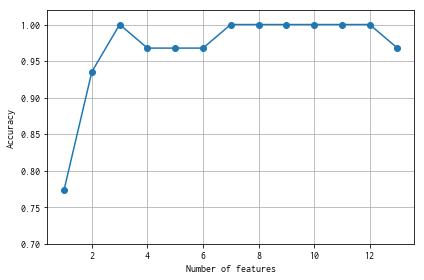

In [35]:
# 特徴量の個数のリスト
k_feat = [len(k) for k in sbs.subsets_]

# 横軸を特徴量の個数、縦軸をスコアとした折れ線グラフのプロット
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [36]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alchol', 'Malic acid', 'OD280/0D315 of diluted wines'], dtype='object')


In [37]:
# 13個すべての特徴量を用いてモデルを適合
knn.fit(X_train_std, y_train)

# トレーニングの正解率を出力
print('Training accuracy:', knn.score(X_train_std, y_train))

# テストの正解率を出力
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.967741935483871
Test accuracy: 0.9629629629629629


In [38]:
# 3つの特徴量を用いてモデルを適合
knn.fit(X_train_std[:, k3], y_train)

# トレーニングの正解率を出力
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))

# テストの正解率を出力
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.9516129032258065
Test accuracy: 0.9259259259259259


 1) Proline                        0.185453
 2) Flavonoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/0D315 of diluted wines   0.136162
 5) Alchol                         0.118529
 6) Hue                            0.058739
 7) Totalphenols                   0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


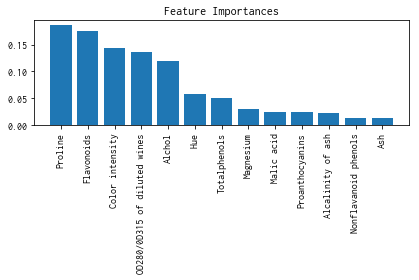

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Wineデータセットの特徴量の名称
feat_labels = df_wine.columns[1:]

# ランダムフォレストオブジェクトの生成(決定木の個数=500)
forest = RandomForestClassifier(n_estimators=500, random_state=1)

# モデルを適合
forest.fit(X_train, y_train)

# 特徴量の重要度を抽出
importances = forest.feature_importances_

# 重要度の降順で特徴量のインデックスを抽出
indices = np.argsort(importances)[::-1]

# 重要度の降順で特徴量の名称、重要度を表示
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [40]:
from sklearn.feature_selection import SelectFromModel

# 特徴選択オブジェクトを生成(重要度のしきい値を0.1に設定)
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)

# 特徴量を抽出
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:', X_selected.shape[1])

for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                           feat_labels[indices[f]],
                           importances[indices[f]]))

Number of features that meet this threshold criterion: 5
 1) Proline                        0.185453
 2) Flavonoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/0D315 of diluted wines   0.136162
 5) Alchol                         0.118529
